<a href="https://colab.research.google.com/github/3ndung/NLP_CLASSIFICATION_LSTM_SIMPLE/blob/main/RNN_BASIC_MULTICLASIFICATION_NLP_NLTK_TYO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras import losses

Cek TF Version

In [3]:
print(tf.__version__)

2.9.2


Download dataset 

In [4]:
dataset_dir = os.path.join(os.path.dirname('dataset'), '/content/drive/MyDrive/TYO_NLTK/DTS3/')

In [5]:
os.listdir(dataset_dir)

['TRAIN', 'TEST']

SET DATA UNTUK DI TRAIN 

In [6]:
train_dir = os.path.join(dataset_dir, 'TRAIN')
os.listdir(train_dir)

['EKO', 'HEL', 'OLA']

SET DATA UNTUK DI TEST

In [7]:
test_dir = os.path.join(dataset_dir, 'TEST')
os.listdir(train_dir)

['EKO', 'HEL', 'OLA']

In [8]:
sample_file = os.path.join(train_dir, 'EKO/103.txt')

with open(sample_file) as f:
  print(f.read())

lps bisa simpan dana di bank sakit di ruu ppsk


In [11]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/TYO_NLTK/DTS3/TRAIN', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [12]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'dpr usul bentuk badan supervisi lps dan ojk di ruu ppsk'
Label 0
Review b'prediksi skor wolves vs brighton di liga inggris 20222023 momentum daniel podence cs keluar dari zona degradasi'
Label 2
Review b'5 alasan marc marquez bakal bantu fabio quartararo juara motogp 2022 nomor 1 penebusan dosa'
Label 2


In [13]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])
print("Label 2 corresponds to", raw_train_ds.class_names[2])

Label 0 corresponds to EKO
Label 1 corresponds to HEL
Label 2 corresponds to OLA


In [14]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/TYO_NLTK/DTS3/TRAIN', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [15]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/TYO_NLTK/DTS3/TEST', 
    batch_size=batch_size)

Found 153 files belonging to 3 classes.


## Membuat function untuk menstandarkan/ menseragamkan string input

In [16]:
def custom_standardization(input_data):
  # Membuat Semua String menjadi Lower String/ huruf kecil Semua
  lowercase = tf.strings.lower(input_data)
  # Menghapus apabila ada html tag
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

## TEXTVECTORIZATION

Adalah pre-processing sebelum proses pembelajaran yang mengubah string mentah kedalam bentuk intger yang dapat dibaca oleh lapisan berikutnya dalam Synapsis/ Layer berikutnya contoh embeding dan denses


In [17]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    # Memanggil fungsi sebelumnya yang mestandarkan semua string input menjadi lower case dan menghilangkan tag html bila ada
    standardize=custom_standardization,
    # Memberikan batasan padding agar panjang matrix sama pada setiap masukan.
    max_tokens=max_features,
    # Output String akan diubah menjadi bentuk integer
    output_mode='int',
    output_sequence_length=sequence_length)

'''
Next, you will call adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.
'''

In [18]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)




# Fungsi yang mengubah setiap string text input ke dalam bentuk intger dan menyimpan dalam array, dengan menggunakan vectorize_layer yang telah diset diatas.

In [19]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [34]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[13], label_batch[13]
print("\nReview -> text_batch[13]", first_review)
print("Label -> Label_batch[13]", raw_train_ds.class_names[first_label])
print("\nVectorized review nya seperti ini \n\n", vectorize_text(first_review, first_label))


Review -> text_batch[13] tf.Tensor(b'ada rekomendasi sepakbola indonesia dibekukan awas ditegur fifa', shape=(), dtype=string)
Label -> Label_batch[13] OLA

Vectorized review nya seperti ini 

 (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  69,  315,  923,   33, 1693,  395, 1648, 1604,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   

In [37]:
print("1693 ---> ",vectorize_layer.get_vocabulary()[1693])
print("395 ---> ",vectorize_layer.get_vocabulary()[395])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1693 --->  dibekukan
395 --->  awas
Vocabulary size: 1953


# Menggubah semua input train, validasi dan test kedalam bentuk integer

In [38]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [39]:
# Tunning dataset train, validasi dan test dengan AUTOTUNE untuk optimisasi shape data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Layer embedding dimension kita set menjadi 16 , seperti yang sering digunakan dalam panduan, embedding ini hanya dapat digunakan pada integer positiv dan untuk memperbaiki matrix.

In [40]:
embedding_dim = 16

In [ ]:
'''model = tf.keras.Sequential([
    
    layers.Embedding(max_features + 1, embedding_dim),    
    layers.Bidirectional(tf.keras.layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)
])


model.summary()

img_file = 'model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)'''


# MODEL RNN INI MEMBERIKAN AKURASI YANG KURANG BAIK DIBANDINGKAN MODEL YANG DIBAWAH DENGAN WAKTU KOMPUTASI YANG LEBIH LAMA
# JADI GAK DIPAKE

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 209,939
Trainable params: 209,939
Non-trainable params: 0
_________________________________________________________________


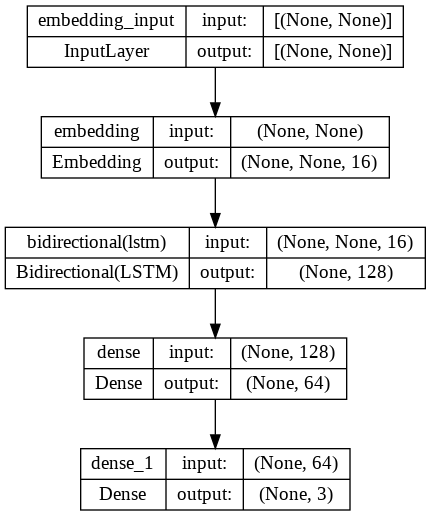

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 160,067
Trainable params: 160,067
Non-trainable params: 0
__________________________________________________

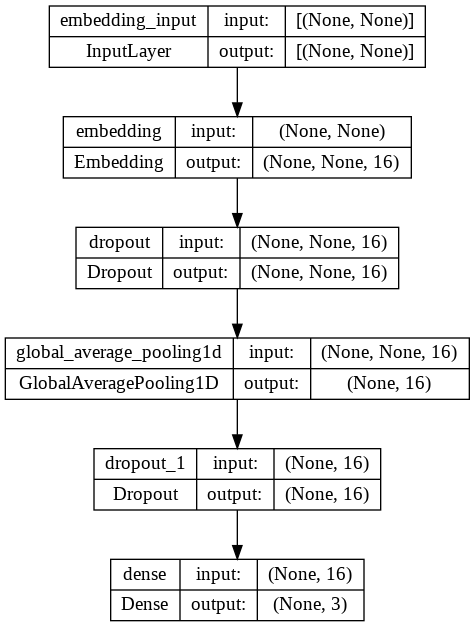

In [41]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(3)])

model.summary()



img_file = 'model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
#model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
#              optimizer='adam',
#              metrics=tf.metrics.Accuracy())




In [42]:
model.compile(loss = losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])

In [87]:
epochs = 150
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/150
15/15 [==============================] - 0s 18ms/step - loss: 0.0310 - accuracy: 0.9979 - val_loss: 0.2317 - val_accuracy: 0.9417
Epoch 2/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0332 - accuracy: 0.9979 - val_loss: 0.2312 - val_accuracy: 0.9417
Epoch 3/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9979 - val_loss: 0.2307 - val_accuracy: 0.9417
Epoch 4/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0339 - accuracy: 0.9958 - val_loss: 0.2309 - val_accuracy: 0.9417
Epoch 5/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0328 - accuracy: 0.9979 - val_loss: 0.2314 - val_accuracy: 0.9500
Epoch 6/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0322 - accuracy: 0.9979 - val_loss: 0.2305 - val_accuracy: 0.9417
Epoch 7/150
15/15 [==============================] - 0s 9ms/step - loss: 0.0337 - accuracy: 0.9979 - val_loss: 0.2296 - val_accuracy: 0.9417
Epoch 8

In [ ]:
model.save('/content/MODEL_TYO/MODEL_TYO_2')

In [88]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8562
Loss:  0.41121599078178406
Accuracy:  0.8562091588973999


In [77]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

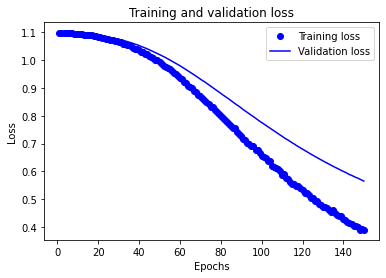

In [81]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

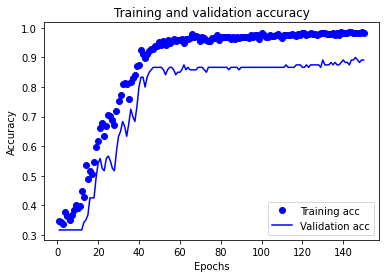

In [82]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [48]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('softmax')
])
export_model.compile(loss = losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])



# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 7ms/step - loss: 0.7776 - accuracy: 0.7974
0.7973856329917908


In [49]:
['EKO', 'HEL', 'OLA']

['EKO', 'HEL', 'OLA']

In [86]:
examples = ["MotoGP 2015 akan dikenang sebagai salah satu yang paling sengit dalam gelaran kejuaraan dunia balap motor grand prix",
            "Ida Fauziyah menargetkan penyaluran Bantuan Subsidi Upah (BSU) atau BLT Gaji melalui PT Pos"]


#for x in examples:
export_model.predict(examples)

1/1 [==============================] - 0s 36ms/step


array([[0.05063059, 0.06929934, 0.8800701 ],
       [0.39243278, 0.33247516, 0.27509207]], dtype=float32)

In [99]:
def Pie_Chart_Visualization(x):

          # Pie chart, where the slices will be ordered and plotted counter-clockwise:
          labels = ['EKO', 'HEL', 'OLA']
          sizes = export_model.predict(examples)[x].tolist()
          explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

          fig1, ax1 = plt.subplots()
          ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                  shadow=True, startangle=90)
          ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

          plt.show()

'MotoGP 2015 akan dikenang sebagai salah satu yang paling sengit dalam gelaran kejuaraan dunia balap motor grand prix'

1/1 [==============================] - 0s 35ms/step


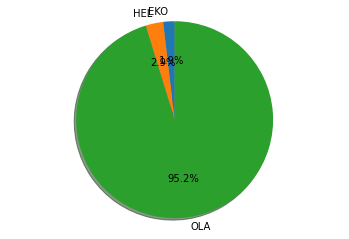

None

'Ida Fauziyah menargetkan penyaluran Bantuan Subsidi Upah (BSU) atau BLT Gaji melalui PT Pos'

1/1 [==============================] - 0s 32ms/step


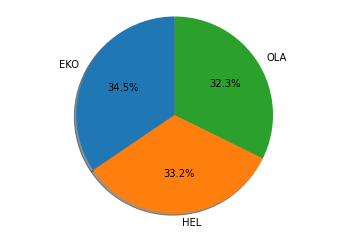

None

In [104]:
for x in range(len(examples)):
  display(examples[x])
  display(Pie_Chart_Visualization(x))
  print('')

In [91]:
LOSS = [0.7776076197624207,0.5466572642326355,0.4511881172657013,0.41121599078178406]
ACCURACY = [0.7973856329917908,0.843137264251709,0.8562091588973999,0.8562091588973999]
EPOCH = [150,300,450,600]

BASIC = pd.DataFrame()
BASIC['EPOCH'] = EPOCH
BASIC['ACCURACY'] = ACCURACY
BASIC['LOSS'] = LOSS


In [93]:
display(BASIC)

,EPOCH,ACCURACY,LOSS
0,150,0.797386,0.777608
1,300,0.843137,0.546657
2,450,0.856209,0.451188
3,600,0.856209,0.411216


In [ ]:
!tar cvfz MODEL_TYO.tar.gz MODEL_TYO

MODEL_TYO/
MODEL_TYO/MODEL_TYO_2/
MODEL_TYO/MODEL_TYO_2/assets/
MODEL_TYO/MODEL_TYO_2/saved_model.pb
MODEL_TYO/MODEL_TYO_2/keras_metadata.pb
MODEL_TYO/MODEL_TYO_2/variables/
MODEL_TYO/MODEL_TYO_2/variables/variables.index
MODEL_TYO/MODEL_TYO_2/variables/variables.data-00000-of-00001
MODEL_TYO/MODEL_TYO_1/
MODEL_TYO/MODEL_TYO_1/assets/
MODEL_TYO/MODEL_TYO_1/saved_model.pb
MODEL_TYO/MODEL_TYO_1/keras_metadata.pb
MODEL_TYO/MODEL_TYO_1/variables/
MODEL_TYO/MODEL_TYO_1/variables/variables.index
MODEL_TYO/MODEL_TYO_1/variables/variables.data-00000-of-00001
